In [1]:
# conda activate py38
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
cv2.__version__

'4.5.1'

In [3]:
# Super Resolution
path = "ESPCN/ESPCN_x4.pb"
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(path)
sr.setModel("espcn",4)

In [4]:
sift = cv2.xfeatures2d.SIFT_create(1000)

In [5]:
prev_path = "previous_img/"
cur_path = "current_img/"
prev_img = []
cur_img = []
prev_img_list = os.listdir(prev_path)
print(prev_img_list)
cur_img_list = os.listdir(cur_path)
print(cur_img_list)
#print('Total Classes Detected', len(pre_img_list))
class_names = []

for cl in prev_img_list:
    img = cv2.imread(prev_path + cl)
    img = cv2.detailEnhance(img,sigma_s=15, sigma_r=0.15)
    img = sr.upsample(img) # Super Resolution
    img = cv2.detailEnhance(img,sigma_s=15, sigma_r=0.15)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.pyrUp(img)
    img = cv2.pyrUp(img)
    prev_img.append(img)
    class_names.append(os.path.splitext(cl)[0])

for cl in cur_img_list:
    img = cv2.imread(cur_path + cl)
    img = cv2.detailEnhance(img,sigma_s=15, sigma_r=0.15)
    img = sr.upsample(img) # Super Resolution
    img = cv2.detailEnhance(img,sigma_s=15, sigma_r=0.15)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.pyrUp(img)
    img = cv2.pyrUp(img)
    cur_img.append(img)
    
print(class_names)

['id_003.png', 'id_005.png', 'id_002.png', 'id_004.png', 'id_001.png']
['id_003.png', 'id_005.png', 'id_002.png', 'id_004.png', 'id_001.png']
['id_003', 'id_005', 'id_002', 'id_004', 'id_001']


In [6]:
def findDes(images):
    desList=[]
    for img in images:
        kp, des = sift.detectAndCompute(img,None)
        desList.append(des)
    return desList

In [7]:
def findID(img, prev_desList, thres):
    cur_kpn, cur_des = sift.detectAndCompute(img, None)
    
    bf = cv2.BFMatcher()
    matchList = []
    finalVal = -1
    ct = 0
    try:
        for p_des in prev_desList:
            matches = bf.knnMatch(p_des, cur_des, k=2)
            print(prev_img_list[ct])
            ct+=1
            print("amount of match features:" + str(len(matches)))
            good = []
            for m, n in matches:
                if m.distance <0.75 *n.distance:
                    good.append([m])
            #print(len(good))
            matchList.append(len(good))
        #print(matchList)
    except:
        print("pass")
        pass

    if len(matchList)!=0:
        if max(matchList) > thres:
            finalVal = matchList.index(max(matchList))

    return finalVal

In [8]:
print(prev_img_list)

['id_003.png', 'id_005.png', 'id_002.png', 'id_004.png', 'id_001.png']


id_003.png
amount of match features:234
id_005.png
amount of match features:203
id_002.png
amount of match features:281
id_004.png
amount of match features:132
id_001.png
amount of match features:189
bring current frame object: id_002.png to find objcet on the previous frame


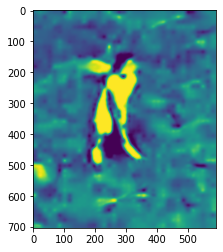

recognized: id_002


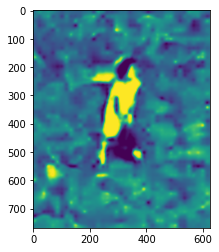

In [10]:
# giving img_index=0~4 to test ID recognition
img_index = 2
prev_desList = findDes(prev_img)
rec_id = findID(cur_img[img_index], prev_desList, 2)

print("bring current frame object: " + cur_img_list[img_index] + " to find objcet on the previous frame")
plt.imshow(cur_img[img_index])
plt.show()
if rec_id != -1:
    regc = class_names[rec_id]
    print("recognized: " + regc)
    plt.imshow(prev_img[class_names.index(regc)])
    plt.show()
else:
    print("bring current frame object:" + cur_img_list[img_index] + " to find objcet on the previous frame")
    print("couldn't find this object on the previous frame")